# **Data Exploration**

## Objectives

Analysis of Key Variable Distribution:  
- Explore the distribution of key variables such as age, education, reproductive history, and healthcare measures to understand their impact on children's anemia levels.

Hypothesis Testing:  
- Test the hypothesis that the aforementioned factors significantly affect the level of anemia in children.

Answer business requirement ???????????????????  
- ??????????????

## Inputs

- outputs/datasets/cleaned/ChildrenAnemia_cleaned_numeric.csv

## Outputs

Analytical Report:  
- A report with findings from the analysis of the distribution of key variables and their potential impact on anemia levels.

Hypothesis Confirmation/Refutation:  
- Conclusions regarding the testing of the hypothesis using statistical methods.

Generated code that answers business requirement 1 and can be used to build the Streamlit App




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ChildrenAnemiaRisk/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ChildrenAnemiaRisk'

---

# Load collected data

In [4]:
import pandas as pd
df_cleaned_path = "outputs/datasets/cleaned/ChildrenAnemia_cleaned_numeric.csv"
df = pd.read_csv(df_cleaned_path)
df.head()

,Type of place of residence,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Currently residing with husband/partner,Had fever in last two weeks,Hemoglobin level child adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup",...,Anemia level child_Moderate,Anemia level child_Not anemic,Anemia level child_Severe,15-19,20-24,25-29,30-34,35-39,40-44,45-49
0,1,1,25,95.0,1,0,1,0,114.0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,30,113.0,1,0,1,0,119.0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2,32,121.0,1,0,1,0,102.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,19,108.0,1,0,1,0,113.0,1,...,0,1,0,0,1,0,0,0,0,0
4,1,1,24,116.0,1,0,1,0,109.0,0,...,0,0,0,0,0,1,0,0,0,0


---

# Inspect downloaded data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10060 entries, 0 to 10059
Data columns (total 40 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Type of place of residence                                             10060 non-null  int64  
 1   Births in last five years                                              10060 non-null  int64  
 2   Age of respondent at 1st birth                                         10060 non-null  int64  
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  10060 non-null  float64
 4   Have mosquito bed net for sleeping (from household questionnaire)      10060 non-null  int64  
 5   Smokes cigarettes                                                      10060 non-null  int64  
 6   Currently residing with husband/partner                                10060 non-null 

---

# Data Exploration

### Visualization of Variables Distributions

This section focuses on visualizing the distribution of key variables such as age, level of education, and reproductive history. These visualizations help in understanding the basic structure of the data and identifying any patterns or anomalies.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This section is dedicated to the visualization of the age distribution within the dataset. The 'Age in 5-year groups' variable represents the ages of individuals, categorized into 5-year intervals. Analyzing the age distribution is essential in many studies, as it provides vital insights into the demographic composition of the population, which can influence a range of factors from health to economic conditions.

For this visualization, we have chosen a bar plot. 

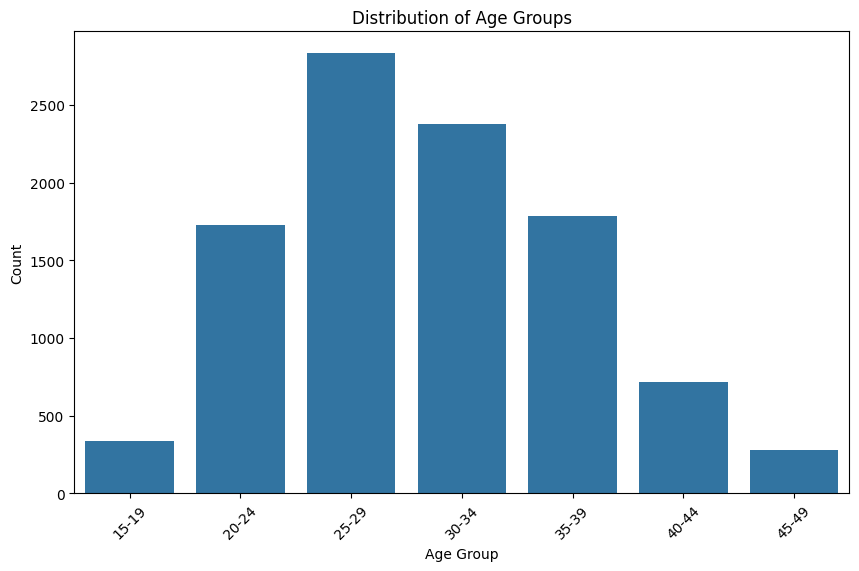

In [8]:
# Creating a temporary column 'age_group' for visualization
df['age_group'] = df[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].idxmax(axis=1)

# Visualization of the Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49'])
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the X-axis labels for better readability
plt.show()

# Removing the temporary 'age_group' column after visualization
df.drop('age_group', axis=1, inplace=True)

This section aims to visualize the age distribution of respondents at the time of their first birth. 

For the visualization of this specific distribution, we use a histogram with a Kernel Density Estimate (KDE) overlay. The histogram is a suitable tool for displaying the frequency distribution of a quantitative variable such as age at first birth. It segments the ages into bins (or intervals) and shows the count of respondents in each bin, which helps in understanding the common age ranges for first-time parenthood.

The addition of a KDE overlay brings a smooth curve that estimates the probability density function of the age distribution. This is particularly useful for identifying general trends and patterns, such as the most common age for first-time parenthood, and whether the distribution is skewed towards younger or older ages.

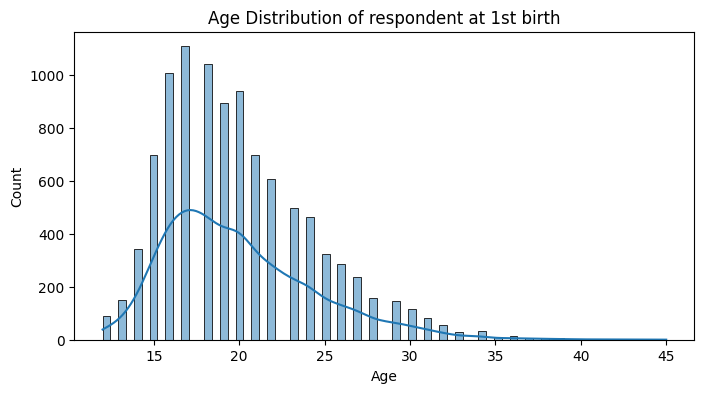

In [9]:
# Visualization of Age Distribution of respondent at 1st birth
plt.figure(figsize=(8, 4))
sns.histplot(df['Age of respondent at 1st birth'], kde=True)
plt.title('Age Distribution of respondent at 1st birth')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This section is dedicated to visualizing the distribution of mosquito bed net usage among the surveyed households. The data for this visualization comes from the variable 'Have mosquito bed net for sleeping (from household questionnaire)', which is a binary variable indicating whether a household has a mosquito bed net for sleeping.

We choose a countplot (a type of bar plot) for this visualization because it is effective in showcasing the distribution of binary (yes/no) data. The countplot provides a clear visual comparison between the number of households with and without mosquito bed nets. This type of visualization is particularly useful for understanding the prevalence of mosquito bed net usage, which can be a significant factor in public health and disease prevention strategies.

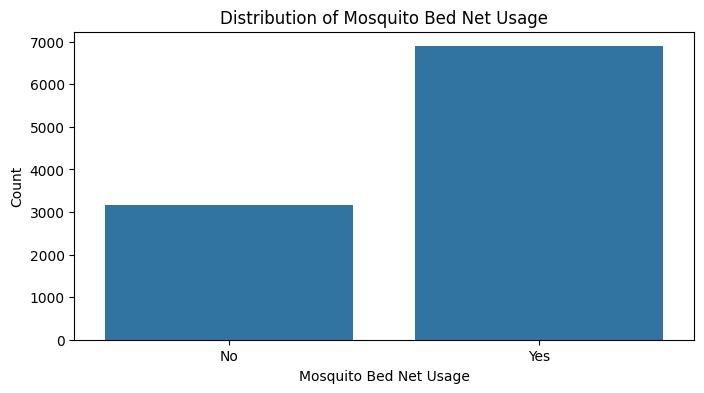

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Have mosquito bed net for sleeping (from household questionnaire)', data=df)
plt.title('Distribution of Mosquito Bed Net Usage')
plt.xlabel('Mosquito Bed Net Usage')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

This visualization aims to show the smoking status of respondents. Since 'Smokes cigarettes' is a binary variable, a countplot provides a straightforward representation of the prevalence of smoking within the population, highlighting the proportion of smokers and non-smokers.

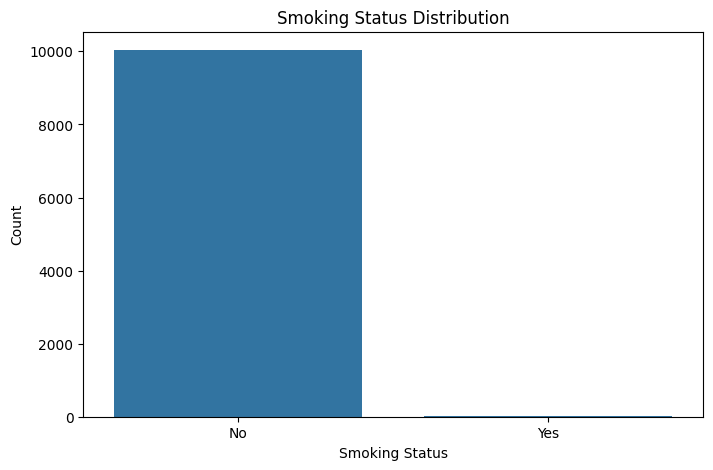

In [11]:
# Visualization of Smoking Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Smokes cigarettes', data=df)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In this section, we aim to visualize the distribution of the 'Currently residing with husband/partner' variable. As this variable encompasses three categories ('Living with her', 'Staying Elsewhere', and 'Unknown', represented by 1, 0, and -1, respectively), we create a temporary column 'Residing Status' to facilitate effective visualization. This approach allows us to utilize a countplot, a type of bar plot provided by the Seaborn library, to display the count of each category distinctly.

To achieve this, we first map the numerical values (1, 0, -1) in the 'Currently residing with husband/partner' column to their corresponding category labels in the new 'Residing Status' column. After using this column for visualization purposes, we remove it to revert the DataFrame to its original structure. 

In [11]:
print(df['Currently residing with husband/partner'].unique())

[ 1  0 -1]


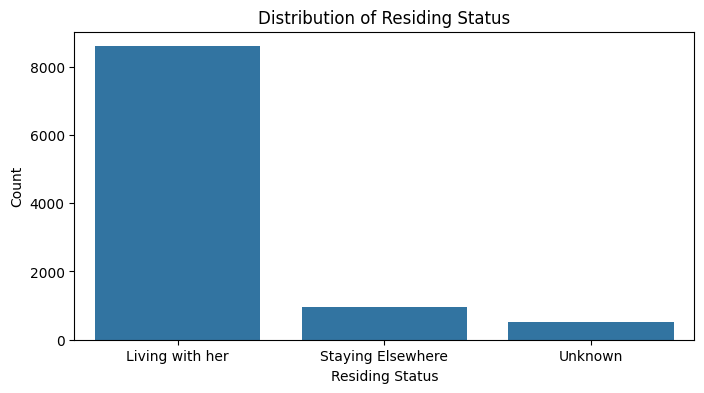

In [12]:
# Create a new column for visualization purposes
# Mapping the numeric values to corresponding textual categories
df['Residing Status'] = df['Currently residing with husband/partner'].map({
    1: 'Living with her', 
    0: 'Staying Elsewhere', 
    -1: 'Unknown'
})

# Visualization using the new column
plt.figure(figsize=(8, 4))
sns.countplot(x='Residing Status', data=df)
plt.title('Distribution of Residing Status')
plt.xlabel('Residing Status')
plt.ylabel('Count')
plt.show()

# Removing the temporary 'Residing Status' column
df.drop('Residing Status', axis=1, inplace=True)

In this section, we are creating a vertical bar chart to visualize the distribution of responses regarding the intake of iron pills, sprinkles, or syrup. A temporary column 'Iron Intake' is created to facilitate this visualization. This column is mapped from the original data, where numerical values (1, 0, -1) are converted to corresponding categories ('Yes', 'No', 'Unknown'). This visualization will provide a clear representation of the frequency of each response category.

After visualizing this data, we remove the temporary column to keep our DataFrame clean and consistent with its original structure. 

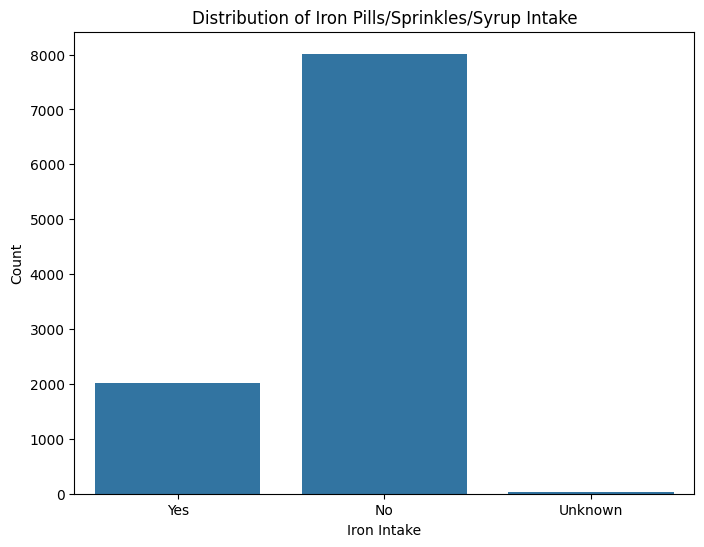

In [13]:
# Creating a temporary column for iron pills/sprinkles/syrup intake
df['Iron Intake'] = df['Taking iron pills, sprinkles or syrup'].map({1: 'Yes', 0: 'No', -1: 'Unknown'})

# Visualization using a vertical bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Iron Intake', data=df, order=['Yes', 'No', 'Unknown'])
plt.title('Distribution of Iron Pills/Sprinkles/Syrup Intake')
plt.xlabel('Iron Intake')
plt.ylabel('Count')
plt.show()

# Removing the temporary column
df.drop('Iron Intake', axis=1, inplace=True)

In this section, we are creating a pie chart to visualize the distribution of education levels among the individuals in our dataset. Since our original data has separate columns for each education level due to one-hot encoding, we first consolidate these into a single 'Education Level' column. This allows us to represent the data more effectively in a pie chart. After the visualization, we remove the temporary 'Education Level' column to maintain the original data structure.


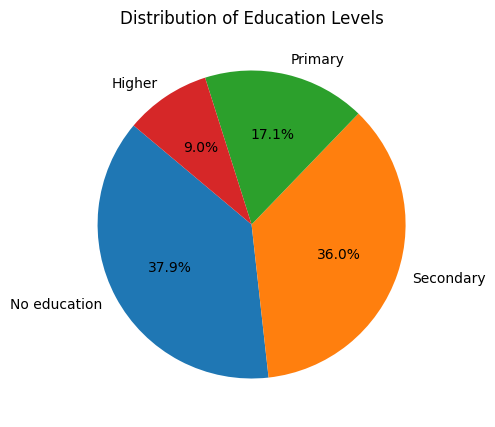

In [14]:
# Creating a separate column for education level
conditions = [
    df['Highest educational level_Higher'] == 1,
    df['Highest educational level_No education'] == 1,
    df['Highest educational level_Primary'] == 1,
    df['Highest educational level_Secondary'] == 1
]
choices = ['Higher', 'No education', 'Primary', 'Secondary']
df['Education Level'] = np.select(conditions, choices, default='Unknown')

# Counting the number of instances for each education level
education_counts = df['Education Level'].value_counts()

# Creating a pie chart
plt.figure(figsize=(5, 5))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.show()

# Removing the temporary 'Education Level' column
df.drop('Education Level', axis=1, inplace=True)

This section focuses on visualizing the distribution of wealth index categories within our dataset. Since the wealth index is split into five separate columns following one-hot encoding (Poorest, Poorer, Middle, Richer, Richest), we first consolidate these columns into a single 'Wealth Index Category' column for effective visualization. A pie chart is chosen for this visualization as it provides a clear and intuitive representation of the proportion of each wealth category in the dataset. After completing the visualization, we will remove the temporary 'Wealth Index Category' column to revert our DataFrame to its original structure.

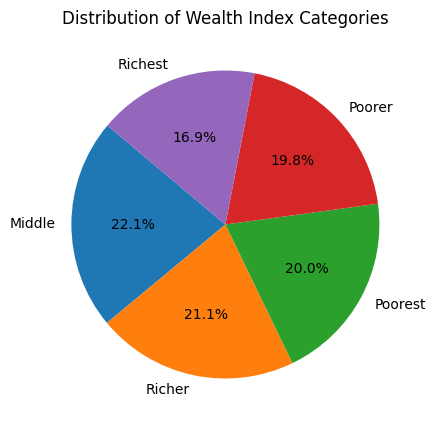

In [16]:
# Creating a temporary column 'Wealth Index Category' for visualization
conditions = [
    df['Wealth index combined_Poorest'] == 1,
    df['Wealth index combined_Poorer'] == 1,
    df['Wealth index combined_Middle'] == 1,
    df['Wealth index combined_Richer'] == 1,
    df['Wealth index combined_Richest'] == 1
]
wealth_choices = ['Poorest', 'Poorer', 'Middle', 'Richer', 'Richest']
df['Wealth Index Category'] = np.select(conditions, wealth_choices, default='Unknown')

# Counting the instances for each wealth category
wealth_counts = df['Wealth Index Category'].value_counts()

# Creating a pie chart
plt.figure(figsize=(5, 5))
plt.pie(wealth_counts, labels=wealth_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wealth Index Categories')
plt.show()

# Removing the temporary 'Wealth Index Category' column after visualization
df.drop('Wealth Index Category', axis=1, inplace=True)

In this section, we create a horizontal bar chart to visualize the distribution of anemia levels among mothers. The temporary column 'Anemia Level Mother' consolidates the one-hot encoded anemia data into a single column for a clearer visualization. After visualizing, we remove this temporary column to maintain the integrity of our original dataset.

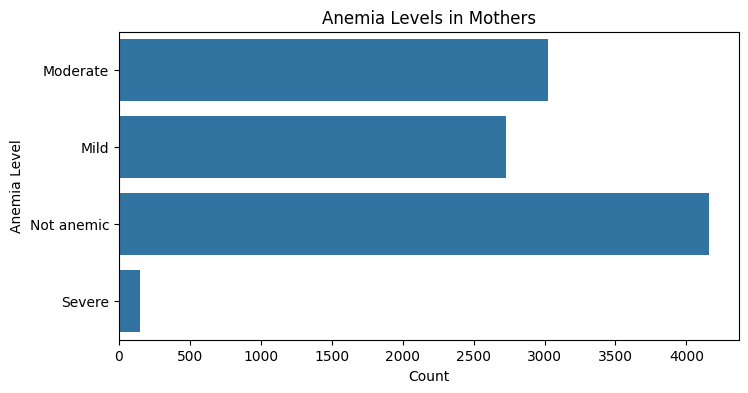

In [18]:
# Creating a temporary column for anemia levels in mothers
conditions = [
    df['Anemia level mother_Severe'] == 1,
    df['Anemia level mother_Moderate'] == 1,
    df['Anemia level mother_Mild'] == 1,
    df['Anemia level mother_Not anemic'] == 1
]
choices = ['Severe', 'Moderate', 'Mild', 'Not anemic']
df['Anemia Level Mother'] = np.select(conditions, choices, default='Unknown')

# Visualization using a horizontal bar chart
plt.figure(figsize=(8, 4))
sns.countplot(y='Anemia Level Mother', data=df)
plt.title('Anemia Levels in Mothers')
plt.xlabel('Count')
plt.ylabel('Anemia Level')
plt.show()

# Removing the temporary column
df.drop('Anemia Level Mother', axis=1, inplace=True)

In this section, we create a horizontal bar chart to visualize the distribution of anemia levels among children, which is the primary focus of the study. The approach mirrors the visualization technique used for mothers, providing a consistent comparison framework. The temporary column 'Anemia Level Child' consolidates the one-hot encoded anemia data into a single column, which is then used for a clear and concise visualization. After the visualization, we remove this column to maintain the original data structure.

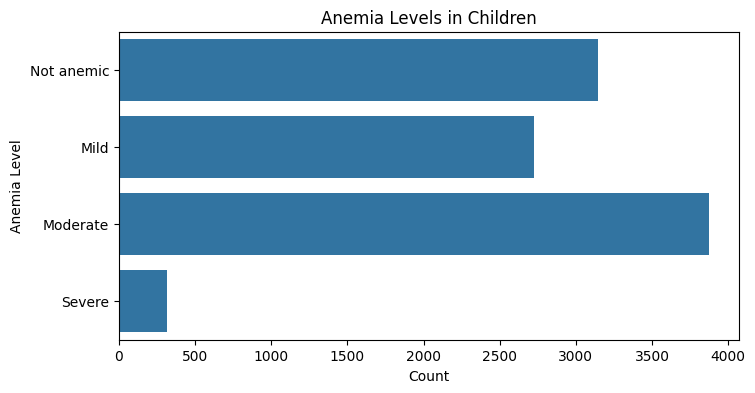

In [19]:
# Creating a temporary column for anemia levels in children
conditions = [
    df['Anemia level child_Severe'] == 1,
    df['Anemia level child_Moderate'] == 1,
    df['Anemia level child_Mild'] == 1,
    df['Anemia level child_Not anemic'] == 1
]
choices = ['Severe', 'Moderate', 'Mild', 'Not anemic']
df['Anemia Level Child'] = np.select(conditions, choices, default='Unknown')

# Visualization using a horizontal bar chart
plt.figure(figsize=(8, 4))
sns.countplot(y='Anemia Level Child', data=df)
plt.title('Anemia Levels in Children')
plt.xlabel('Count')
plt.ylabel('Anemia Level')
plt.show()

# Removing the temporary column
df.drop('Anemia Level Child', axis=1, inplace=True)

In this section, we aim to visualize the distribution of hemoglobin levels among adults and children. Hemoglobin levels are a crucial health indicator, and understanding their distribution in the population can provide valuable insights into overall health and nutritional status.

We have chosen to use histograms with Kernel Density Estimate (KDE) overlays for this visualization. Histograms are ideal for displaying the frequency distribution of continuous data, such as hemoglobin levels. They allow us to see the concentration of values within certain ranges and identify any patterns or outliers in the data.

The KDE overlay adds a smooth curve to the histogram, which helps in visualizing the density of the data points and understanding the shape of the distribution. This can be particularly useful for identifying whether the data is normally distributed, skewed, or has multiple peaks.

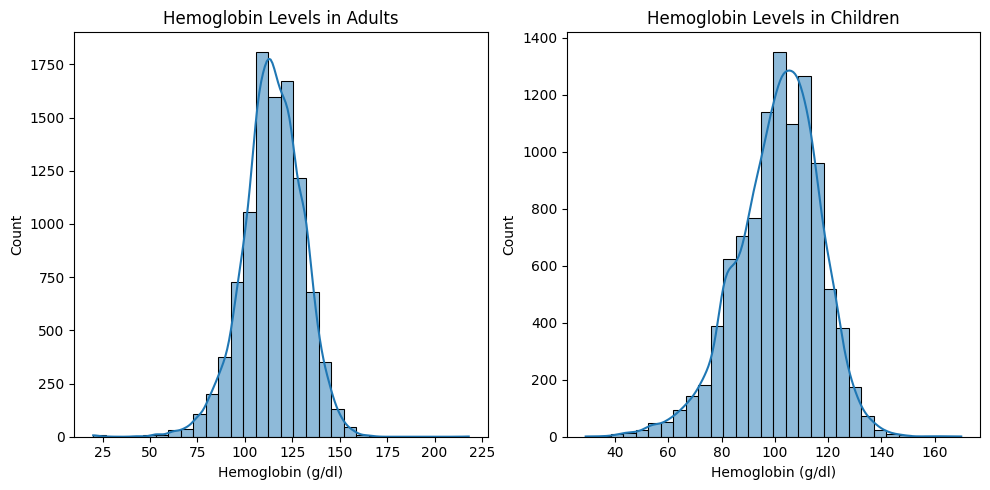

In [20]:
# Visualization of Hemoglobin Levels in Adults
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First subplot for adult hemoglobin levels
sns.histplot(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'], kde=True, bins=30)
plt.title('Hemoglobin Levels in Adults')
plt.xlabel('Hemoglobin (g/dl)')
plt.ylabel('Count')

# Visualization of Hemoglobin Levels in Children
plt.subplot(1, 2, 2)  # Second subplot for child hemoglobin levels
sns.histplot(df['Hemoglobin level child adjusted for altitude (g/dl - 1 decimal)'], kde=True, bins=30)
plt.title('Hemoglobin Levels in Children')
plt.xlabel('Hemoglobin (g/dl)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

---

# Statistic Study

### Heatmap of Correlations

In this section, we generate a heatmap to visualize the correlations between different variables in the dataset. This heatmap helps in identifying potential relationships and patterns within the data, which can be crucial for understanding the underlying structure and informing further analysis.

A correlation heatmap is particularly useful in spotting variables that are strongly related to each other, either positively or negatively. It can also help in detecting multicollinearity, where two or more variables are highly correlated. Identifying such relationships is important for making informed decisions about feature selection and modeling strategies in later stages of the analysis.

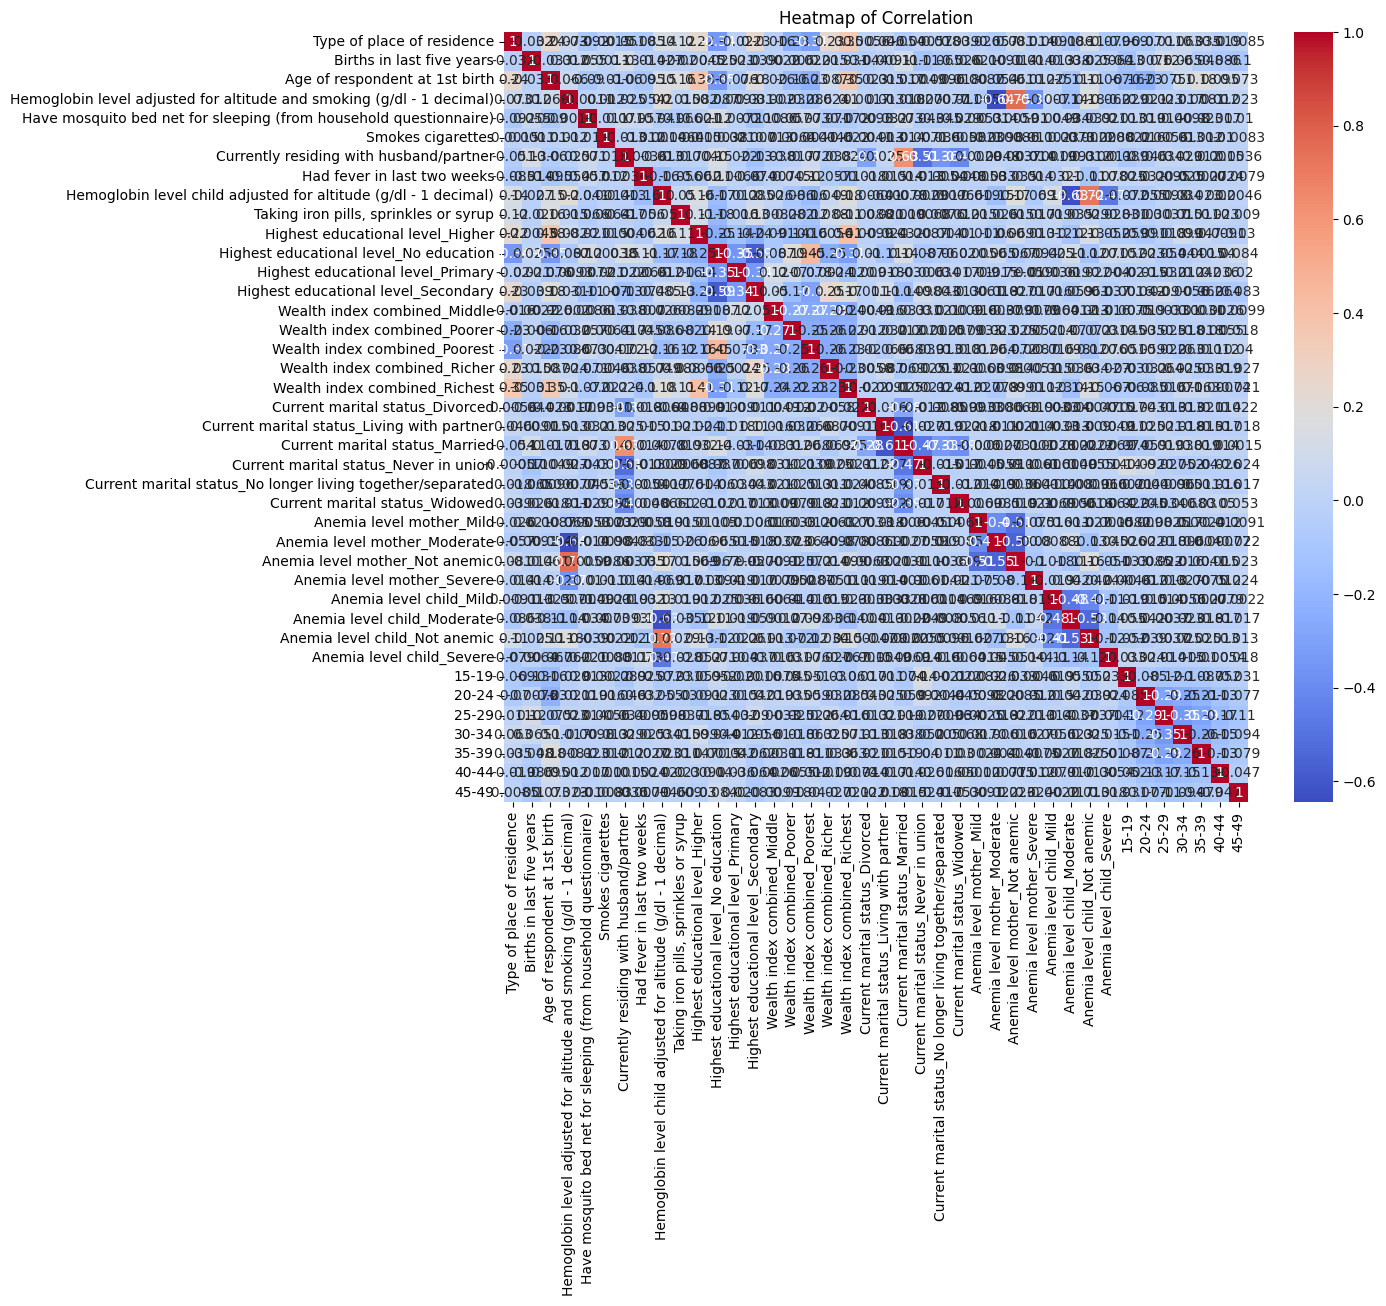

In [21]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

The objective of this code is to automatically sift through a large number of variable pairs and identify those with strong correlations. This can highlight potential areas of interest for further analysis or provide insights into the data structure, such as identifying variables that might be predictors of others or that share a common cause.



In [24]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Setting a significance threshold
threshold = 0.5

# Finding and displaying significant correlations
# The matrix is filtered to find absolute correlations greater than the threshold, excluding self-correlations (correlation of a variable with itself)
significant_corrs = (corr_matrix[abs(corr_matrix) > threshold][corr_matrix != 1.0]).unstack().dropna().to_dict()

# Filtering out duplicate correlations (since A correlated with B is the same as B correlated with A)
unique_corrs = {}

for (var1, var2), corr in significant_corrs.items():
    if (var2, var1) not in unique_corrs:
        unique_corrs[(var1, var2)] = corr

# Printing out the significant correlations
for (var1, var2), corr in unique_corrs.items():
    print(f"Correlation between {var1} and {var2}: {corr}")

Correlation between Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal) and Anemia level mother_Moderate: -0.6445933326776864
Correlation between Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal) and Anemia level mother_Not anemic: 0.7499670967205463
Correlation between Currently residing with husband/partner and Current marital status_Married: 0.6334246584295287
Correlation between Currently residing with husband/partner and Current marital status_Never in union: -0.5101291584184614
Correlation between Hemoglobin level child adjusted for altitude (g/dl - 1 decimal) and Anemia level child_Moderate: -0.6333080621762518
Correlation between Hemoglobin level child adjusted for altitude (g/dl - 1 decimal) and Anemia level child_Not anemic: 0.7187314319346012
Correlation between Highest educational level_No education and Highest educational level_Secondary: -0.5860061974102863
Correlation between Current marital status_Living with partner and Current mar

This analysis complements the heatmap visualization previously created. While the heatmap provides an overall visual understanding of correlations, the tabular results allow for a more precise and nuanced examination of the specific strengths of these correlations.

In [23]:
# Selecting the target columns
target_columns = ['Anemia level child_Mild', 'Anemia level child_Moderate', 'Anemia level child_Not anemic', 'Anemia level child_Severe']

# Selecting the other columns (non-target variables)
other_columns = df.columns.difference(target_columns)

# Preparing a DataFrame to store the results of correlation analysis
correlation_results = pd.DataFrame()

# Calculating correlations for each target variable
# Here we compute the correlation of each non-target variable with each target variable
for target in target_columns:
    correlations = df[other_columns].corrwith(df[target]).sort_values(ascending=False)
    correlation_results[target] = correlations

# Displaying the results of the correlation analysis
print(correlation_results)

                                                    Anemia level child_Mild  \
Hemoglobin level child adjusted for altitude (g...                 0.128948   
Age of respondent at 1st birth                                     0.024894   
Wealth index combined_Richest                                      0.022876   
Taking iron pills, sprinkles or syrup                              0.019005   
Anemia level mother_Mild                                           0.016354   
Highest educational level_Secondary                                0.015538   
Wealth index combined_Richer                                       0.015172   
25-29                                                              0.013584   
Highest educational level_Higher                                   0.012036   
Type of place of residence                                         0.009061   
Anemia level mother_Moderate                                       0.008824   
40-44                                               

---

# Finding

In our analysis, we have identified correlations between hemoglobin levels and the levels of anemia. However, these correlations are somewhat expected as they are inherently linked; higher levels of hemoglobin generally indicate a lower likelihood of anemia, and vice versa. This relationship is a direct consequence of the medical definitions and physiology associated with anemia.

Beyond the correlation between hemoglobin levels and anemia, our results do not reveal any other significant correlations with the target variable that could facilitate predictive modeling. The absence of other strong, non-obvious correlations implies that the current dataset may not contain sufficient or relevant information for building effective machine learning models for predictive analysis.

Predictive modeling in machine learning typically requires identifying a set of independent variables that have a significant and non-obvious relationship with the target variable. In our case, the lack of such variables in the dataset hampers our ability to construct a model that could predict anemia levels in children based on a broader set of factors.

---

# Decicion

Given these findings, we have decided to conclude further investigation with the current dataset. Our next step will be to explore other datasets that might offer a richer set of variables and more complex relationships. This new direction aims to fulfill the requirements of our educational project more effectively, allowing us to apply machine learning techniques to a dataset with a more diverse range of predictive factors.